In [29]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import cv2
import Augmentor

In [30]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\kanag\Downloads\trained\train'
p = Augmentor.Pipeline(r'C:\Users\kanag\Downloads\trained\train')


Initialised with 5219 image(s) found.
Output directory set to C:\Users\kanag\Downloads\trained\train\output.

In [31]:
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(10)


Processing <PIL.Image.Image image mode=L size=176x208 at 0x1E20E72B6A0>: 100%|██████████| 10/10 [00:00<00:00, 285.67 Samples/s]


In [32]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [33]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
for layer in inception.layers:
    layer.trainable = False

In [35]:
from glob import glob
import os

# Only pick directories inside Train folder
folders = [f for f in glob('Train/*') if os.path.isdir(f)]
folders.sort()

print(folders)

['Train\\MildDemented', 'Train\\ModerateDemented', 'Train\\NonDemented', 'Train\\Normal', 'Train\\VeryMildDemented']


In [36]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [37]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,058,789 (84.15 MB)

 Trainable params: 256,005 (1000.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [38]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [40]:
# Training Generator
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


print(training_set.class_indices)

Found 5219 images belonging to 5 classes.
{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'Normal': 3, 'VeryMildDemented': 4}


In [41]:
# Testing Generator
test_set = test_datagen.flow_from_directory('Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5219 images belonging to 5 classes.


In [47]:
# fit the model, it will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.6477 - loss: 2.1884 - val_accuracy: 0.5993 - val_loss: 2.2014
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 411s 3s/step - accuracy: 0.6878 - loss: 1.5989 - val_accuracy: 0.7934 - val_loss: 0.7625
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7214 - loss: 1.2789 - val_accuracy: 0.6838 - val_loss: 1.5007
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.6841 - loss: 1.8385 - val_accuracy: 0.7590 - val_loss: 1.1409
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.7010 - loss: 1.7000 - val_accuracy: 0.6348 - val_loss: 1.9063
Epoch 6/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.7422 - loss: 1.2071 - val_accuracy: 0.8040 - val_loss: 0.7227
Epoch 7/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 1879s 12s/step - accuracy: 0.7199 - loss: 1.4590 - val_accuracy: 0.7498 - val_loss: 1.1673
Epoch 8/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.7032 - loss: 1.9074 - val_ac

In [48]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

164/164 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step
                  precision    recall  f1-score   support

    MildDemented       0.14      0.08      0.10       717
ModerateDemented       0.00      0.00      0.00        52
     NonDemented       0.49      0.53      0.51      2560
          Normal       0.02      0.02      0.02        98
VeryMildDemented       0.35      0.37      0.36      1792

        accuracy                           0.40      5219
       macro avg       0.20      0.20      0.20      5219
    weighted avg       0.38      0.40      0.39      5219



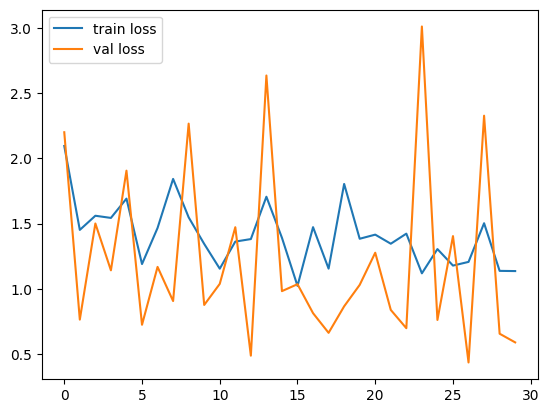

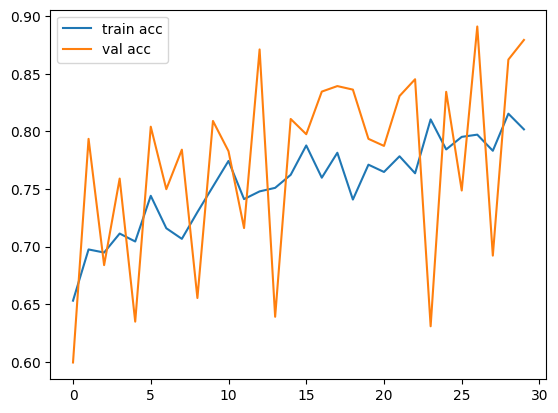

<Figure size 640x480 with 0 Axes>

In [49]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [50]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [51]:
y_pred = model.predict(test_set)
y_pred

164/164 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step


array([[1.1680761e-10, 0.0000000e+00, 9.6377598e-06, 0.0000000e+00,
        9.9999034e-01],
       [6.1001238e-15, 0.0000000e+00, 9.9862146e-01, 0.0000000e+00,
        1.3785884e-03],
       [1.2171816e-16, 0.0000000e+00, 9.9999762e-01, 0.0000000e+00,
        2.3862490e-06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [6.2883815e-10, 3.3785632e-08, 8.9928806e-05, 0.0000000e+00,
        9.9991012e-01],
       [1.0695930e-05, 0.0000000e+00, 9.9989402e-01, 0.0000000e+00,
        9.5219111e-05]], dtype=float32)

In [52]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 2, 2, ..., 3, 4, 2])